# Resultados: Proposta "with zero"

Variação da proposta original, atribuindo zero para os features que ocorreram depois da ocorrência (ground truth) da Ferrugem Asiática naquela instâcia.

In [1]:
import pandas as pd
import math

from datetime import datetime

current_datetime_gen = datetime.now().strftime("%Y-%m-%d %H:%M")
current_datetime_gen

'2024-05-14 15:12'

## Erro para todas as safras

In [2]:
train_test_results_df = pd.read_csv("Data/proposta_results_with_zero_all.csv")

train_test_results_df.head(40)

,Unnamed: 0,index,planting_relative_day,safra,predicted_planting_relative_day,distance,fold
0,0,0,116,NaN,116.0,0.0,1
1,1,7,82,NaN,82.0,0.0,1
2,2,15,82,NaN,82.0,0.0,1
3,3,29,68,NaN,68.0,0.0,1
4,4,37,82,NaN,82.0,0.0,1
5,5,43,116,NaN,116.0,0.0,1
6,6,47,82,NaN,82.0,0.0,1
7,7,48,82,NaN,82.0,0.0,1
8,8,51,82,NaN,82.0,0.0,1
9,9,56,82,NaN,82.0,0.0,1


<Axes: title={'center': "Distribuição de 'dia relativo da safra' ocorrido (ML) >2024-05-14 15:12<"}, ylabel='Frequency'>

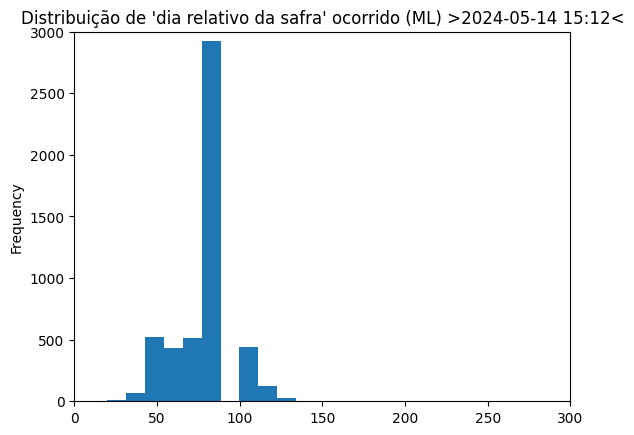

In [3]:
train_test_results_df["planting_relative_day"].plot(kind="hist", xlim=(0, 300), ylim=(0, 3000), title=f"Distribuição de 'dia relativo da safra' ocorrido (ML) >{current_datetime_gen}<")

<Axes: title={'center': "Distribuição de 'dia relativo da safra' predito (ML) >2024-05-14 15:12<"}, ylabel='Frequency'>

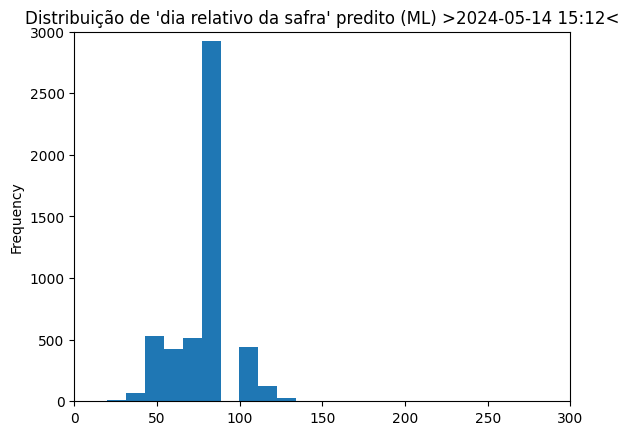

In [4]:
train_test_results_df["predicted_planting_relative_day"].plot(kind="hist", xlim=(0, 300), ylim=(0, 3000), title=f"Distribuição de 'dia relativo da safra' predito (ML) >{current_datetime_gen}<")

In [5]:
K_FOLDS = 5

each_fold_error_list = []


for k_num in range(1, K_FOLDS + 1):
    df = train_test_results_df.copy()
    df = df[df["fold"] == k_num]
    
    df['distance_pow2'] = pow(df['predicted_planting_relative_day'] - df['planting_relative_day'], 2)
    
    error_rmse = {
        'error': math.sqrt(df['distance_pow2'].sum() / df.shape[0]),
    }

    print(f"=====> Fold: {k_num}")
    print(f"=====> Average error: {error_rmse['error']}")
    print()

    each_fold_error_list.append({
        "fold": k_num,
        "error": error_rmse['error'],
    })

each_fold_error_list

=====> Fold: 1
=====> Average error: 0.0

=====> Fold: 2
=====> Average error: 0.3520689835386817

=====> Fold: 3
=====> Average error: 0.15025801261740165

=====> Fold: 4
=====> Average error: 0.43820014558296616

=====> Fold: 5
=====> Average error: 0.0



[{'fold': 1, 'error': 0.0},
 {'fold': 2, 'error': 0.3520689835386817},
 {'fold': 3, 'error': 0.15025801261740165},
 {'fold': 4, 'error': 0.43820014558296616},
 {'fold': 5, 'error': 0.0}]

Erro para todas as safras: 0.1881054283478099


[Text(0, 0, '0.188105')]

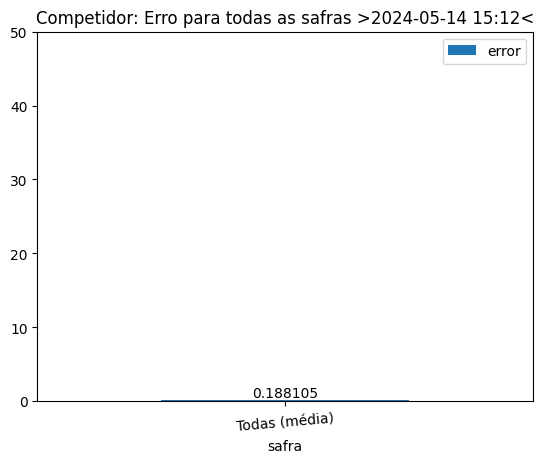

In [6]:
each_fold_error_df = pd.DataFrame(each_fold_error_list)

error = each_fold_error_df["error"].mean()
error_df = pd.DataFrame([{
    "safra": "Todas (média)",
    "error": error,
}])

print(f"Erro para todas as safras: {error}")

ax = error_df.plot(x="safra", y="error", kind="bar", ylim=(0, 50), rot=5, fontsize=10, title=f"Competidor: Erro para todas as safras >{current_datetime_gen}<")
ax.bar_label(ax.containers[0])


## Erros para cada safra

In [7]:
train_test_results_safra_df = pd.read_csv("Data/proposta_results_with_zero_harvest_all.csv")
safras = train_test_results_safra_df["safra"].unique()

print(safras)
train_test_results_safra_df.head()

['2021/2022' '2020/2021' '2019/2020' '2018/2019' '2017/2018' '2016/2017'
 '2015/2016' '2014/2015' '2013/2014' '2012/2013' '2011/2012' '2010/2011'
 '2009/2010' '2008/2009' '2007/2008' '2006/2007' '2005/2006' '2004/2005']


,Unnamed: 0,index,planting_relative_day,safra,predicted_planting_relative_day,distance,fold
0,0,6,104,2021/2022,107.88,3.88,1
1,1,8,56,2021/2022,82.00,26.00,1
2,2,10,104,2021/2022,104.64,0.64,1
3,3,17,82,2021/2022,82.44,0.44,1
4,0,4,82,2021/2022,77.80,4.20,2


In [8]:
K_FOLDS = 5

each_safra_fold_error_list = []

for safra in safras:
    for k_num in range(1, K_FOLDS + 1):
        df = train_test_results_safra_df.copy()
        df = df[df["fold"] == k_num]
        df = df[df["safra"] == safra]
        
        # calculating average accuracy for 5d, 10d and 15d
        df['distance_pow2'] = pow(df['predicted_planting_relative_day'] - df['planting_relative_day'], 2)
        
        error_rmse = {
            'error': math.sqrt(df['distance_pow2'].sum() / df.shape[0]),
        }
    
        print(f"=====> Fold: {k_num}")
        print(f"=====> Average error: {error_rmse['error']}")
        print()
    
        each_safra_fold_error_list.append({
            "safra": safra,
            "fold": k_num,
            "error": error_rmse['error'],
        })

each_safra_fold_error_df = pd.DataFrame(each_safra_fold_error_list)
each_safra_fold_error_df

=====> Fold: 1
=====> Average error: 13.1496920116024

=====> Fold: 2
=====> Average error: 2.623432865540876

=====> Fold: 3
=====> Average error: 6.957628906459443

=====> Fold: 4
=====> Average error: 1.8971557658769045

=====> Fold: 5
=====> Average error: 3.0118432894159723

=====> Fold: 1
=====> Average error: 0.48922387513284704

=====> Fold: 2
=====> Average error: 3.0023290958853917

=====> Fold: 3
=====> Average error: 0.13512956745287077

=====> Fold: 4
=====> Average error: 0.38621237680840764

=====> Fold: 5
=====> Average error: 5.271250326061171

=====> Fold: 1
=====> Average error: 0.8970024154556853

=====> Fold: 2
=====> Average error: 0.8709928653143908

=====> Fold: 3
=====> Average error: 1.5090583629724674

=====> Fold: 4
=====> Average error: 2.296419573410498

=====> Fold: 5
=====> Average error: 0.6160704968937042

=====> Fold: 1
=====> Average error: 3.8210600623387236

=====> Fold: 2
=====> Average error: 4.150522055517033

=====> Fold: 3
=====> Average error

,safra,fold,error
0,2021/2022,1,13.149692
1,2021/2022,2,2.623433
2,2021/2022,3,6.957629
3,2021/2022,4,1.897156
4,2021/2022,5,3.011843
...,...,...,...
85,2004/2005,1,0.933257
86,2004/2005,2,0.613690
87,2004/2005,3,0.169706
88,2004/2005,4,0.169706


In [9]:
df = each_safra_fold_error_df.copy()
df = df[["safra", "error"]].groupby("safra", as_index=False).mean()

each_safra_fold_error_df = df
each_safra_fold_error_df.head(40)

,safra,error
0,2004/2005,1.258345
1,2005/2006,0.830840
2,2006/2007,0.436790
3,2007/2008,0.462889
4,2008/2009,0.083049
5,2009/2010,0.909932
6,2010/2011,0.650895
7,2011/2012,6.603314
8,2012/2013,1.899326
9,2013/2014,1.428783


<Axes: title={'center': 'Competidor: Erros para cada safra >2024-05-14 15:12<'}, xlabel='safra'>

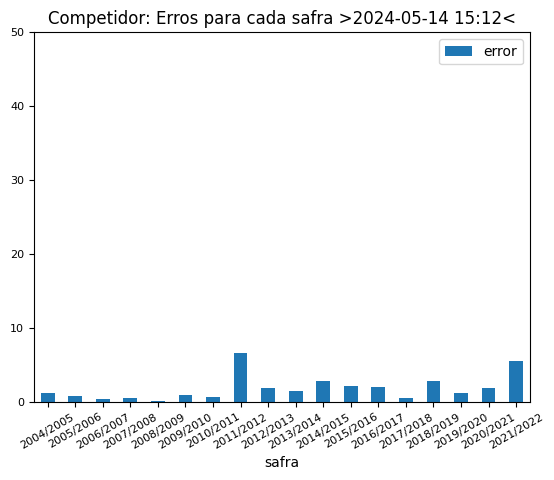

In [10]:
each_safra_fold_error_df.plot(x="safra", y="error", ylim=(0, 50), kind="bar", rot=30, fontsize=8, title=f"Competidor: Erros para cada safra >{current_datetime_gen}<")